# **CCPP Energy Output Prediction**

**Importing dependencies**

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**---- INITIAL DATA ANALYSIS ----**

In [2]:
dataset = pd.read_csv('dataset.csv')

In [3]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
dataset.tail()

,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [5]:
dataset.shape

(9568, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [7]:
dataset.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


**Dividing data into X and Y for splitting**

In [10]:
X = dataset.iloc[:,:-1]
Y = dataset['PE']


**Analysis of above operation**

In [11]:
print(X)

         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


In [12]:
print(Y)

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64


**----- BUILDING A MODEL -----**

**Splitting the data for training and testing**

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=54)

**Analysis of above split**

In [15]:
print(X_train.shape)
print(X_test.shape)

(7654, 4)
(1914, 4)


In [16]:
print(Y_train.shape)
print(Y_test.shape)

(7654,)
(1914,)


**Scaling the data with Min-Max Scalar**

In [17]:
MM_Scalar = MinMaxScaler()
X_train_transformed = MM_Scalar.fit_transform(X_train)
X_test_transformed = MM_Scalar.transform(X_test)

**Scaled data**

In [18]:
print(X_train_transformed)

[[0.43966006 0.49466192 0.50222993 0.76800862]
 [0.59575071 0.64964413 0.4395441  0.34711189]
 [0.84447592 0.68843416 0.44722498 0.44486334]
 ...
 [0.66572238 0.87135231 0.5488107  0.72694224]
 [0.63966006 0.8272242  0.4172448  0.62407432]
 [0.58555241 0.74893238 0.54212091 0.51178134]]


In [19]:
print(X_test_transformed)

[[ 0.91869688  0.87740214  0.57854311 -0.00444325]
 [ 0.3631728   0.28238434  0.15039643  0.81473004]
 [ 0.24107649  0.26672598  0.46456888  0.78308873]
 ...
 [ 0.12152975  0.24857651  0.43384539  0.93510166]
 [ 0.39773371  0.43291815  0.55971259  0.84502491]
 [ 0.44957507  0.3480427   0.78444004  0.58987478]]


In [68]:
print(Y_test)

8061    425.58
3818    466.36
5123    481.51
5176    482.69
6217    434.50
         ...  
6213    482.85
3763    484.45
5265    491.37
1771    464.72
8978    458.12
Name: PE, Length: 1914, dtype: float64


**Initializing the models and training them**

In [81]:
models = {
    'LR' : LinearRegression(),
    'DCR' : DecisionTreeRegressor(),
    'SVR' : SVR(kernel='rbf'),
    'KNN' : KNeighborsRegressor(n_neighbors=5),
    'RF' : RandomForestRegressor(n_estimators=150),
}

for name, model in models.items():
    model.fit(X_train_transformed, Y_train)
print('All models trained')


All models trained


**Prediction for test data**

In [82]:
for name, model in models.items():
    y_pred = model.predict(X_test_transformed)
    print(y_pred)

[428.58488743 464.29086755 474.17350209 ... 480.8177394  460.63556174
 461.80654764]
[427.69 466.83 479.64 ... 490.76 462.84 462.81]
[437.65239886 466.7215898  478.61577433 ... 483.68511744 460.32622489
 459.77587766]
[428.106 467.726 477.696 ... 490.188 462.204 459.244]
[428.02286667 466.92486667 478.93653333 ... 489.6744     464.6272
 459.07386667]


**---- VISUALIZATON ----**  

**Residual Graphs for each models**

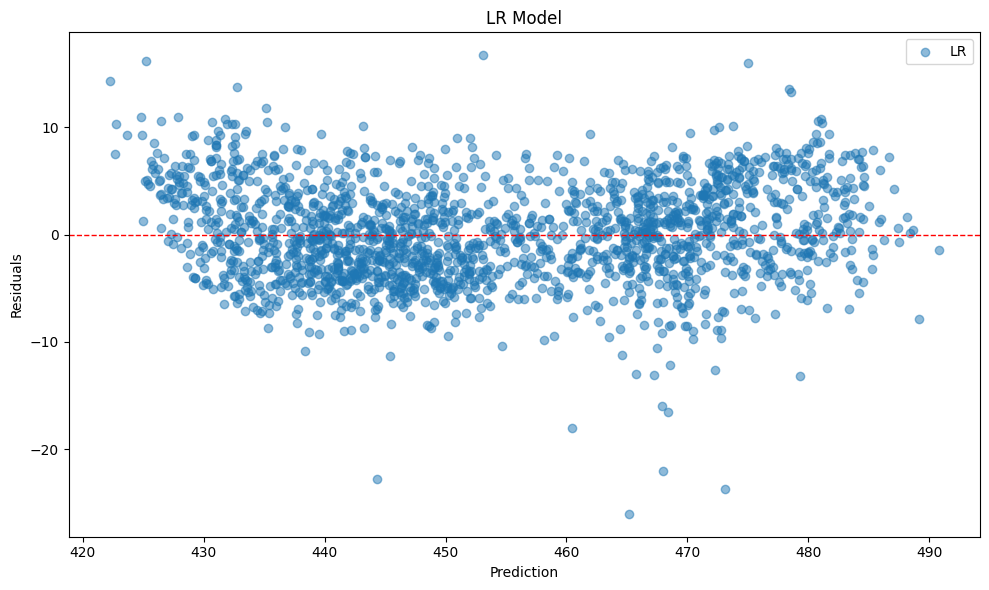

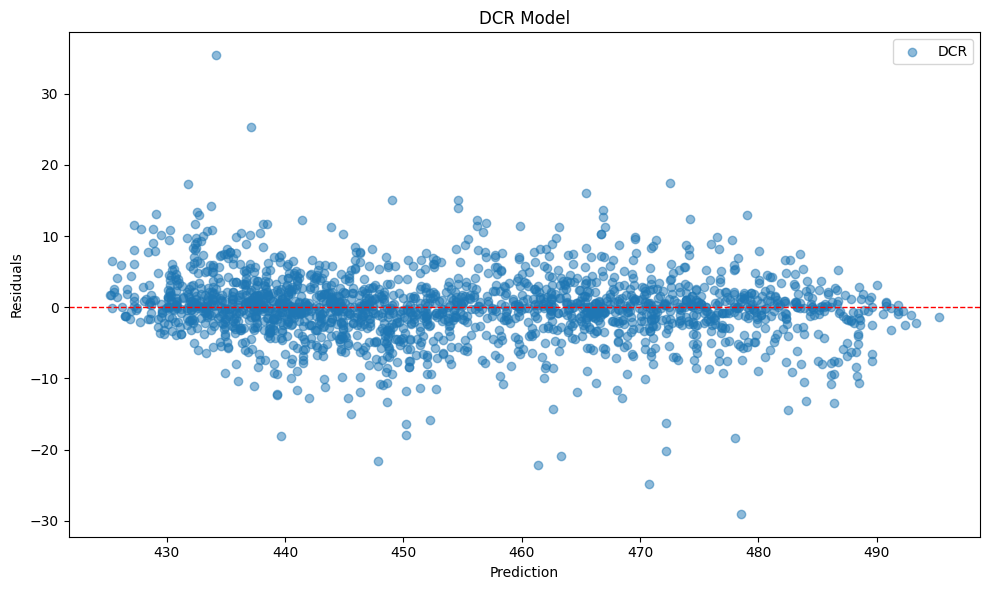

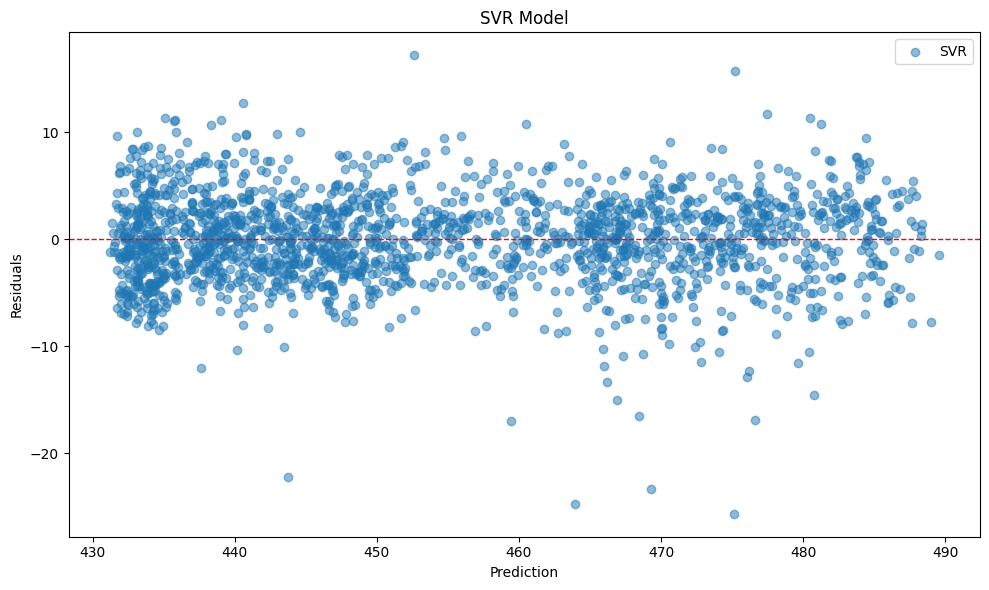

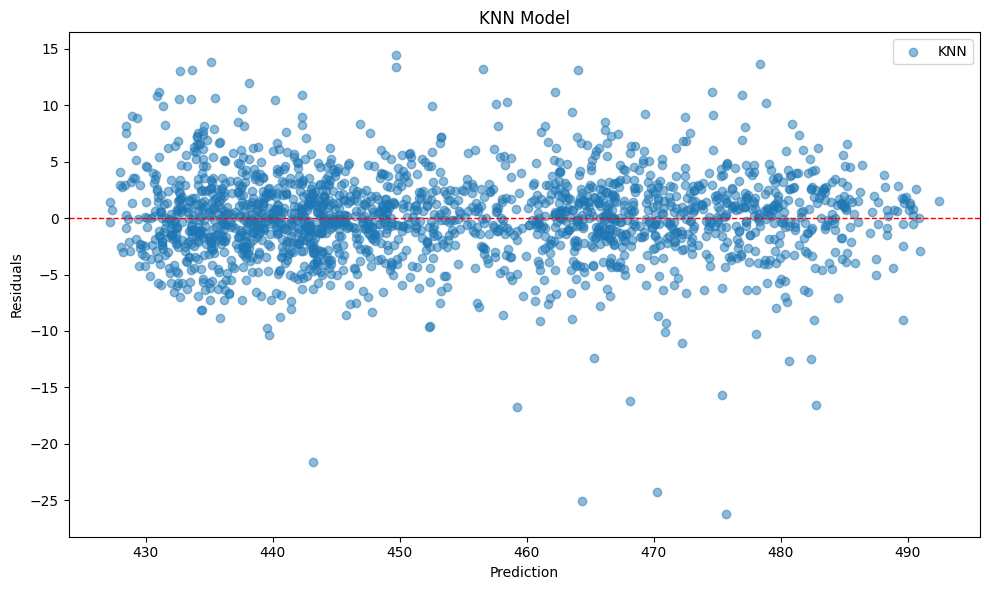

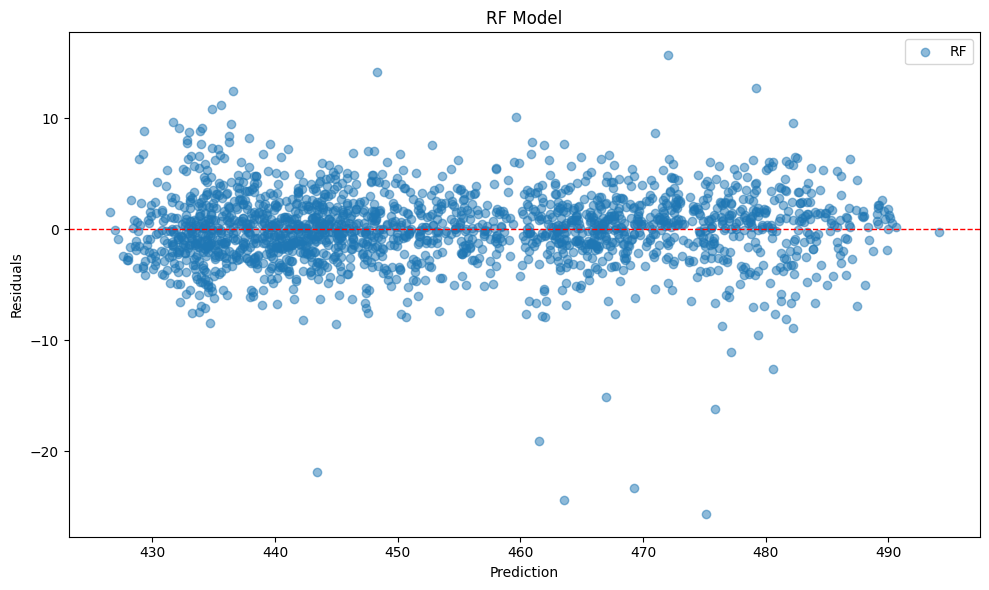

In [102]:
for name, model in models.items():
    plt.figure(figsize=(10,6))
    y_pred = model.predict(X_test_transformed)
    residuals= Y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5, label=f'{name}')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.xlabel('Prediction')
    plt.ylabel('Residuals')
    plt.title(f'{name} Model')
    plt.legend()
    plt.tight_layout()
    plt.show()

**----- MODEL EVALUATION ----**

**Finding Accuracy on training data model wise**

In [83]:
for name, model in models.items():
    X_train_accuracy = model.score(X_train_transformed, Y_train)
    print(f"Training Accuracy of {name} : {X_train_accuracy}")

Training Accuracy of LR : 0.9284035504864612
Training Accuracy of DCR : 1.0
Training Accuracy of SVR : 0.9404586838809602
Training Accuracy of KNN : 0.9684224708809739
Training Accuracy of RF : 0.9946407055643385


In [84]:
for name, model in models.items():
    X_test_accuracy = model.score(X_test_transformed, Y_test)
    print(f"Accuracy of {name} : {X_test_accuracy}")

Accuracy of LR : 0.9297416705696255
Accuracy of DCR : 0.9263525361632456
Accuracy of SVR : 0.9421592596747044
Accuracy of KNN : 0.9517445196526793
Accuracy of RF : 0.963551396712483


**EVALUATION METRICS**

In [85]:
for name, model in models.items():

    y_pred = model.predict(X_test_transformed)

    MAE = mean_absolute_error(Y_test, y_pred)
    MSE = mean_squared_error(Y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_score = r2_score(Y_test, y_pred)

    print(f'         {name}')
    print('  -----------------')
    print(f'MAE : {MAE}')
    print(f'MSE : {MSE}')
    print(f'RMSE : {RMSE}')
    print(f'R2_score : {R2_score}')
    print('                      ')


         LR
  -----------------
MAE : 3.6263816584693
MSE : 20.72100728108538
RMSE : 4.5520333128268495
R2_score : 0.9297416705696255
                      
         DCR
  -----------------
MAE : 3.2181922675026127
MSE : 21.72055109717869
RMSE : 4.660531203326364
R2_score : 0.9263525361632456
                      
         SVR
  -----------------
MAE : 3.157211076977012
MSE : 17.058737535334423
RMSE : 4.130222455913776
R2_score : 0.9421592596747044
                      
         KNN
  -----------------
MAE : 2.7248160919540227
MSE : 14.231795258098217
RMSE : 3.772505170055863
R2_score : 0.9517445196526793
                      
         RF
  -----------------
MAE : 2.347188888888883
MSE : 10.749640366192896
RMSE : 3.278664418050877
R2_score : 0.963551396712483
                      


**---- CONCLUSION ----**

**Random Forest is the best model for this regression task**

# **Thank You!**